In [1]:
import matplotlib.pyplot as plt
import numpy as np
import edl
import plotting

%matplotlib widget

In [2]:
ion_concentration_molar = 1e-1
ion_diameter_m = 10e-10
solvent_diameter_m = 2.75e-10
gamma_c = (ion_diameter_m/solvent_diameter_m)**3
phi0 = 0.3
xmin = -0.05
xmax = 10

## Gouy-Chapman
Gives insight, but ion concentrations are much too high.

Sweep from 0.00V to 0.29V. Maximum relative residual: 3.47171e-05.


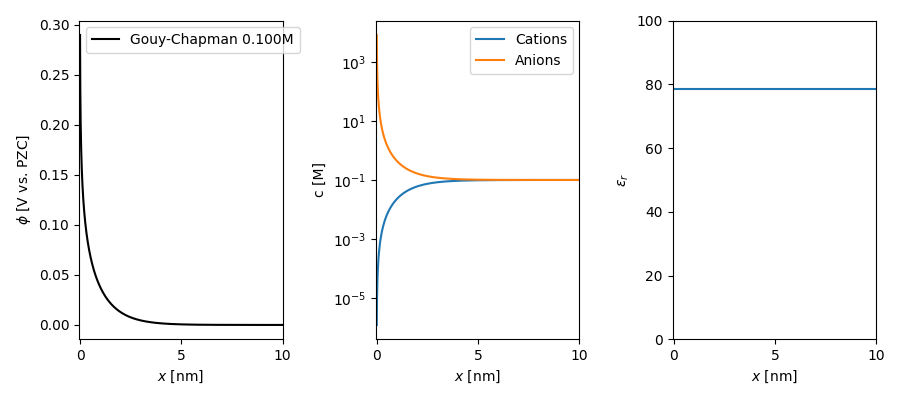

In [3]:
gc = edl.GouyChapman(ion_concentration_molar)
gc_sol = gc.spatial_profiles(phi0)

fig, ax = plotting.plot_solution(gc_sol, xmin, xmax)
plt.show()

## Borukhov-Andelman-Orland
Ion concentration is limited to its maximum value at the electrode.

Sweep from 0.00V to 0.29V. Maximum relative residual: 3.64786e-05.


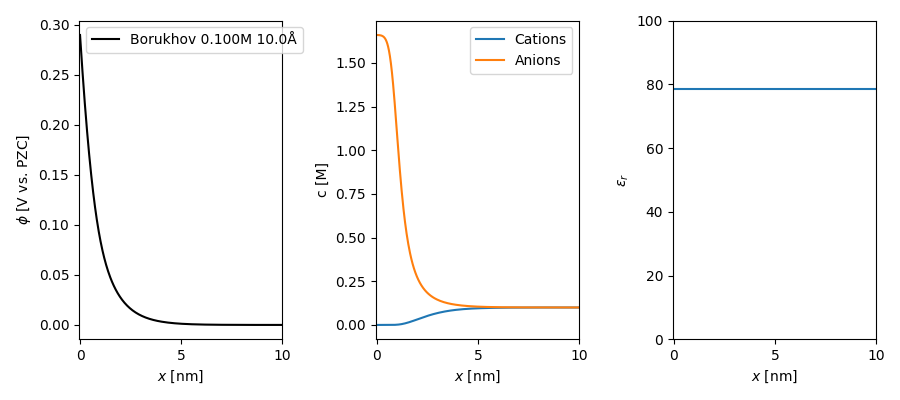

In [4]:
bao = edl.Borukhov(ion_concentration_molar, ion_diameter_m)
bao_sol = bao.spatial_profiles(phi0)

fig, ax = plotting.plot_solution(bao_sol, xmin, xmax, logscale=False)
plt.show()

## Abrashkin-Andelman-Orland
A Stern layer emerges if the dipole energy is more negative (large dipole moment and large electric field) than the Coulomb energy of ions directly at the electrode.

Sweep from 0.00V to -0.29V. Maximum relative residual: 3.04138e-05.


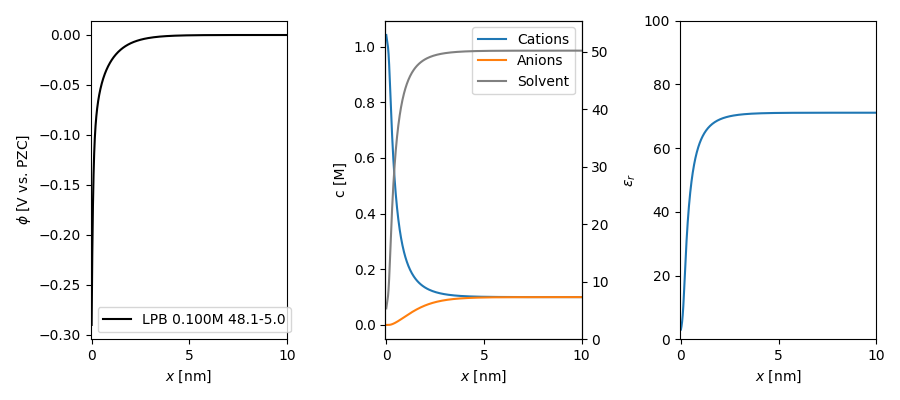

In [5]:
abr = edl.Abrashkin(ion_concentration_molar, gamma_c, 5, eps_r_opt=1)
abr_sol = abr.spatial_profiles(-phi0)

fig, ax = plotting.plot_solution(abr_sol, xmin, xmax, logscale=False)
plt.show()